# Maestría en Inteligencia Artificial Aplicada

# TC 4033: Visión computacional para imágenes y video

# Tecnológico de Monterrey

## Dr. Gilberto Ochoa Ruiz

# **# 6. Otsu Thresholding**

## **Equipo # 16**
### Edwin David Hernández Alejandre A01794692
### Miguel Guillermo Galindo Orozco A01793695
### Jorge Pedroza Rivera A01319553
### Juan Carlos Alvarado Carricarte A01793486
### Gerardo Aaron Castañeda Jaramillo A01137646

## Table of Contents
1. [Libraries](#libraries)
2. [Single Thresholding](#single)
3. [Multi Thresholding](#multi)
4. [Ejercicio](#Ejercicio)
5. [Conclusiones](#Conclusiones)
6. [Referencias](#Referencias)

Thresholding is used to create a binary image from a grayscale image

## Importing Libraries <a class="anchor" id="libraries" ></a>

In [9]:
import matplotlib.pyplot as plt
from skimage import data
from skimage.filters import threshold_otsu
from skimage.filters import threshold_multiotsu
import numpy as np
import cv2

## Single Thresholding <a class="anchor" id="single" ></a>

We illustrate how to apply one of these thresholding algorithms.
Otsu's method [2]_ calculates an "optimal" threshold (marked by a red line in the
histogram below) by maximizing the variance between two classes of pixels,
which are separated by the threshold. Equivalently, this threshold minimizes
the intra-class variance.

C:\Users\G\AppData\Local\Temp\ipykernel_26240\1528479257.py:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])


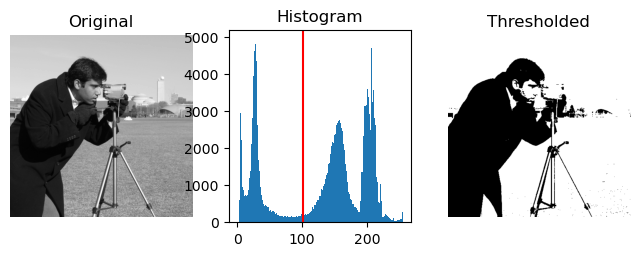

In [2]:
image = data.camera()
thresh = threshold_otsu(image)
binary = image > thresh

fig, axes = plt.subplots(ncols=3, figsize=(8, 2.5))
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].hist(image.ravel(), bins=256)
ax[1].set_title('Histogram')
ax[1].axvline(thresh, color='r')

ax[2].imshow(binary, cmap=plt.cm.gray)
ax[2].set_title('Thresholded')
ax[2].axis('off')

plt.show()

If you are not familiar with the details of the different algorithms and the
underlying assumptions, it is often difficult to know which algorithm will give
the best results. Therefore, Scikit-image includes a function to evaluate
thresholding algorithms provided by the library. At a glance, you can select
the best algorithm for your data without a deep understanding of their
mechanisms.




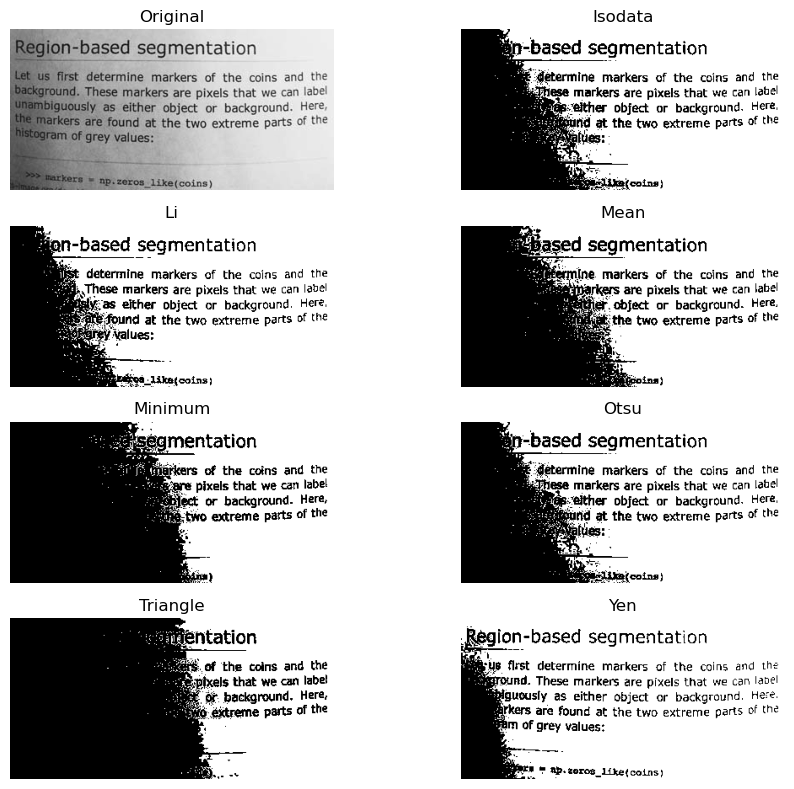

In [3]:
from skimage.filters import try_all_threshold

img = data.page()

fig, ax = try_all_threshold(img, figsize=(10, 8), verbose=False)
plt.show()

In [4]:
# TODO: Slide image for segmentation, alpha blerding

## Multi Thresholding <a class="anchor" id="multi" ></a>

The multi-Otsu threshold  is a thresholding algorithm that is used to separate
the pixels of an input image into several different classes, each one obtained
according to the intensity of the gray levels within the image.

Multi-Otsu calculates several thresholds, determined by the number of desired
classes. The default number of classes is 3: for obtaining three classes, the
algorithm returns two threshold values. They are represented by a red line in
the histogram below.

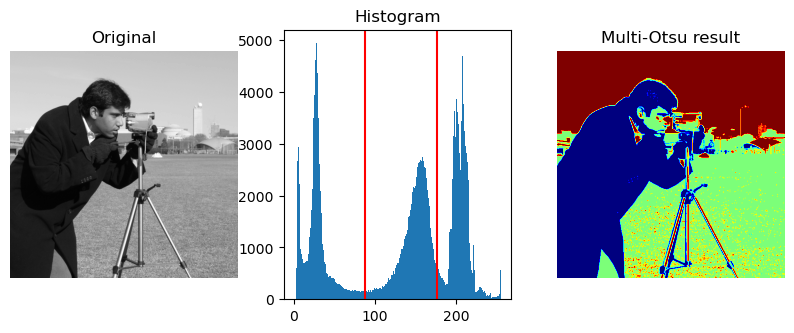

In [5]:
# The input image.
image = data.camera()

# Applying multi-Otsu threshold for the default value, generating
# three classes.
thresholds = threshold_multiotsu(image)

# Using the threshold values, we generate the three regions.
regions = np.digitize(image, bins=thresholds)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 3.5))

# Plotting the original image.
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original')
ax[0].axis('off')

# Plotting the histogram and the two thresholds obtained from
# multi-Otsu.
ax[1].hist(image.ravel(), bins=255)
ax[1].set_title('Histogram')
for thresh in thresholds:
    ax[1].axvline(thresh, color='r')

# Plotting the Multi Otsu result.
ax[2].imshow(regions, cmap='jet')
ax[2].set_title('Multi-Otsu result')
ax[2].axis('off')

plt.subplots_adjust()

plt.show()

# **Ejercicio** <a class="anchor" id="Ejercicio" ></a>

Experimenta con diferentes imagenes ademas de las provistas en en Colab, identifca imagenes con diferentes backgrounds y estilos, cuales son las limitaciones de single thresholding contra el algoritmo de Otsu

Comenzamos creando una función para aplicar el método de otsu para 1 solo threshold:

In [12]:
def single_tres_otsu(img):
    thresh = threshold_otsu(image)
    binary = image > thresh

    fig, axes = plt.subplots(ncols=3, figsize=(8, 2.5))
    ax = axes.ravel()
    ax[0] = plt.subplot(1, 3, 1)
    ax[1] = plt.subplot(1, 3, 2)
    ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

    ax[0].imshow(image, cmap=plt.cm.gray)
    ax[0].set_title('Original')
    ax[0].axis('off')

    ax[1].hist(image.ravel(), bins=256)
    ax[1].set_title('Histogram')
    ax[1].axvline(thresh, color='r')

    ax[2].imshow(binary, cmap=plt.cm.gray)
    ax[2].set_title('Thresholded')
    ax[2].axis('off')
    plt.subplots_adjust()

    plt.show()    

Cargamos 6 imágenes utilizadas en actividades previas:

In [50]:
image_1 = cv2.imread('data/image_1.jpg', cv2.IMREAD_GRAYSCALE)
image_2 = cv2.imread('data/image_2.jpg', cv2.IMREAD_GRAYSCALE)
image_3 = cv2.imread('data/image_3.jpg', cv2.IMREAD_GRAYSCALE)
image_4 = cv2.imread('data/image_4.jpg', cv2.IMREAD_GRAYSCALE)
image_5 = cv2.imread('data/image_5.jpg', cv2.IMREAD_GRAYSCALE)
image_6 = cv2.imread('data/image_6.jpg', cv2.IMREAD_GRAYSCALE)

images = []

images = [image_1, image_2, image_3, image_4, image_5, image_6]

Aplicamos median filter a un par de ellas para mejor funcionamiento:

In [ ]:
images[0] = cv2.medianBlur(images[0], 5)
images[1] = cv2.medianBlur(images[1], 5)
#images[4] = cv2.medianBlur(images[4], 5)
#images[5] = cv2.medianBlur(images[5], 5)

Aplicamos el método a cada una:

C:\Users\G\AppData\Local\Temp\ipykernel_26240\3126854094.py:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])


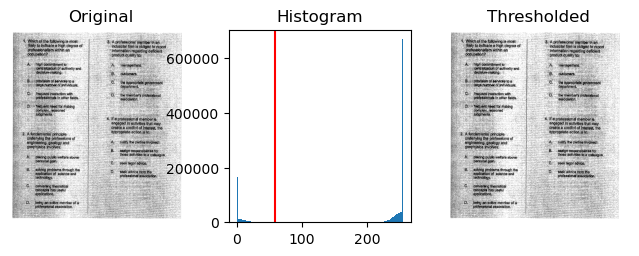

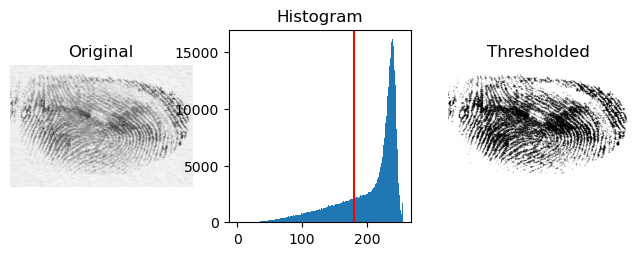

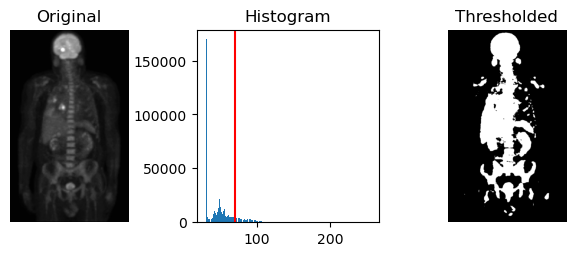

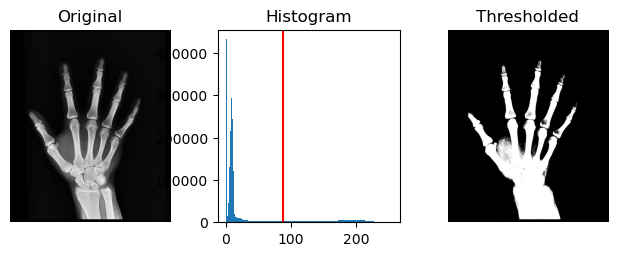

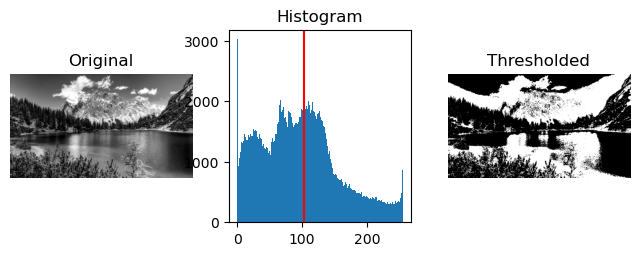

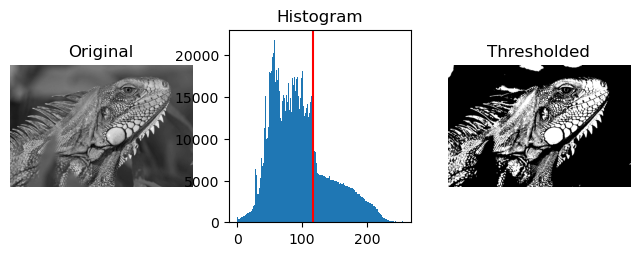

In [65]:
for image in images:
    single_tres_otsu(image)

Ahora generamos una función para aplicar le método de threshold múltiple:

In [61]:
def multi_tres_otsu(image):
    thresholds = threshold_multiotsu(image)
    regions = np.digitize(image, bins=thresholds)

    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 3.5))

    ax[0].imshow(image, cmap='gray')
    ax[0].set_title('Original')
    ax[0].axis('off')

    ax[1].hist(image.ravel(), bins=255)
    ax[1].set_title('Histogram')
    for thresh in thresholds:
        ax[1].axvline(thresh, color='r')

    ax[2].imshow(regions, cmap='jet')
    ax[2].set_title('Multi-Otsu result')
    ax[2].axis('off')

    plt.subplots_adjust()

    plt.show()

Lo aplicamos a las mismas imágenes:

In [62]:
images = [image_1, image_2, image_3, image_4, image_5, image_6]

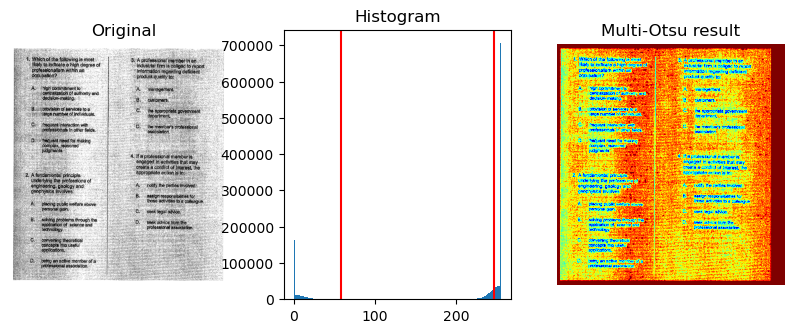

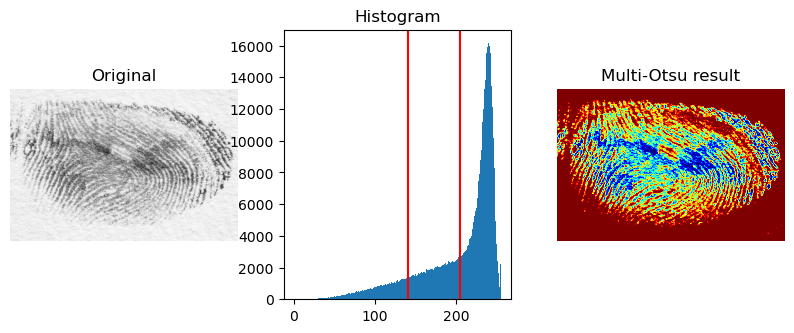

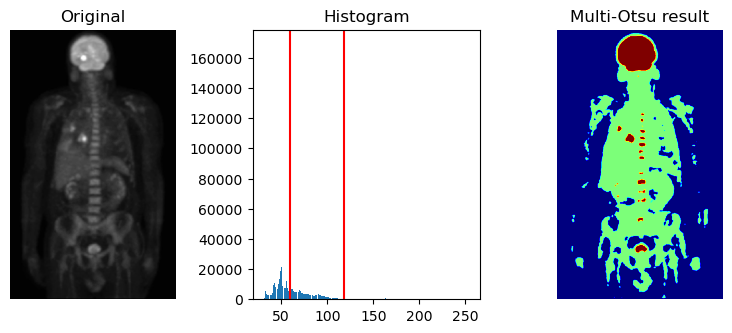

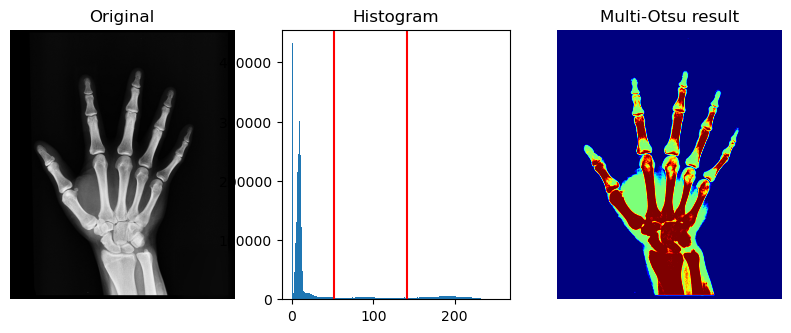

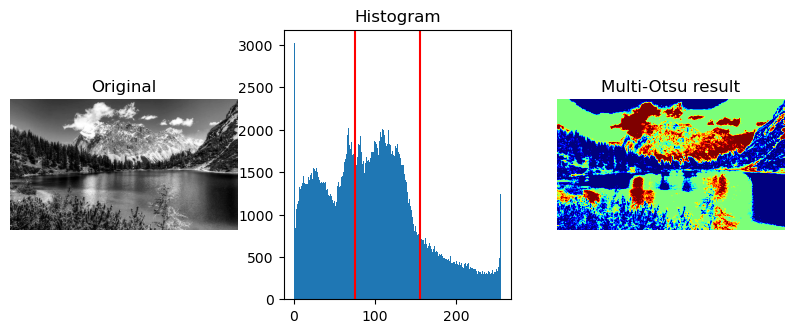

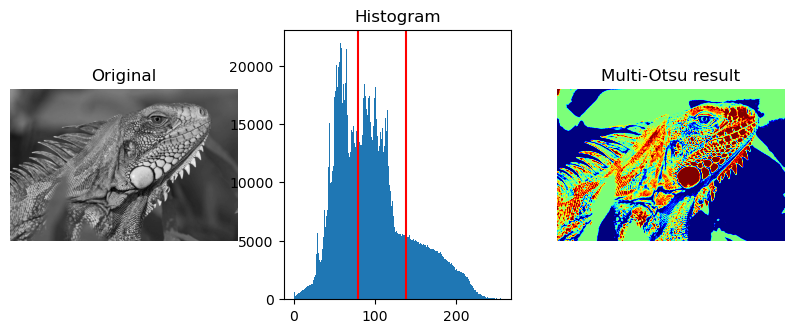

In [63]:
for image in images:
    multi_tres_otsu(image)

# **Conclusiones** <a class="anchor" id="Conclusiones" ></a>

El método de otsu es una técnica de thresholding automática que se utiliza para determinar uno o varios umbrales optimo al separar los pixeles de una imagen en clases distintas. Este método es bueno en su eficiencia al hacer el cálculo, y ayuda al no tener que establecerlo anualmente. Además de que tiene buena adaptabilidad para la distribución de intensidades en iluminación y contraste. Generalmente es utilizado en aplicaciones de segmentación de imágenes, donde se requiere separar objetos de interés de un fondo. 

Una nota particular con la primera imagen y con 1 solo umbral, fue que el ruido que tenia la imagen no lo permitía funcionar bien. Por lo se soluciono aplicando un median filter. Seguido, fue posible convertir la imagen a una imagen binaria donde la identificación del texto fuera mucho mas sencilla. 

Al observar la diferencia entre las imágenes con 1 solo umbral, y con 3 clases, fue posible como variaba la distribución de intensidades entre las imágenes. Sin embargo, es claro notar que, dependiendo de la imagen, estas pueden requerir cierto pre-procesamiento de imagen para adaptarlas al método. Ya que es sensible al ruido. 

# **Referencias** <a class="anchor" id="Referencias" ></a>

* baeldung. (2023). Understanding Otsu’s Method for Image Segmentation. Retrieved from Baeldung: https://www.baeldung.com/cs/otsu-segmentation
* Geeks For Geeks. (2021). Mahotas – Otsu’s method. Retrieved from Geeks For Geeks: https://www.geeksforgeeks.org/mahotas-otsus-method/
* Gonzalez, R., & Woods, R. (2018). Digital Image Processing. Pearson.
* Murzova, A. (2020). Otsu’s Thresholding with OpenCV. Retrieved from LearnOpenCV: https://learnopencv.com/otsu-thresholding-with-opencv/
* Muthukrishnan. (2020). Otsu’s method for image thresholding explained and implemented. Retrieved from MUTHU: https://muthu.co/otsus-method-for-image-thresholding-explained-and-implemented/
* OpenCV. (n.d.). Image Thresholding. Retrieved from OpenCV: https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html






